Accuracy: 0.7924753657808301
[[1336  406]
 [ 289 1318]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1742
           1       0.76      0.82      0.79      1607

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



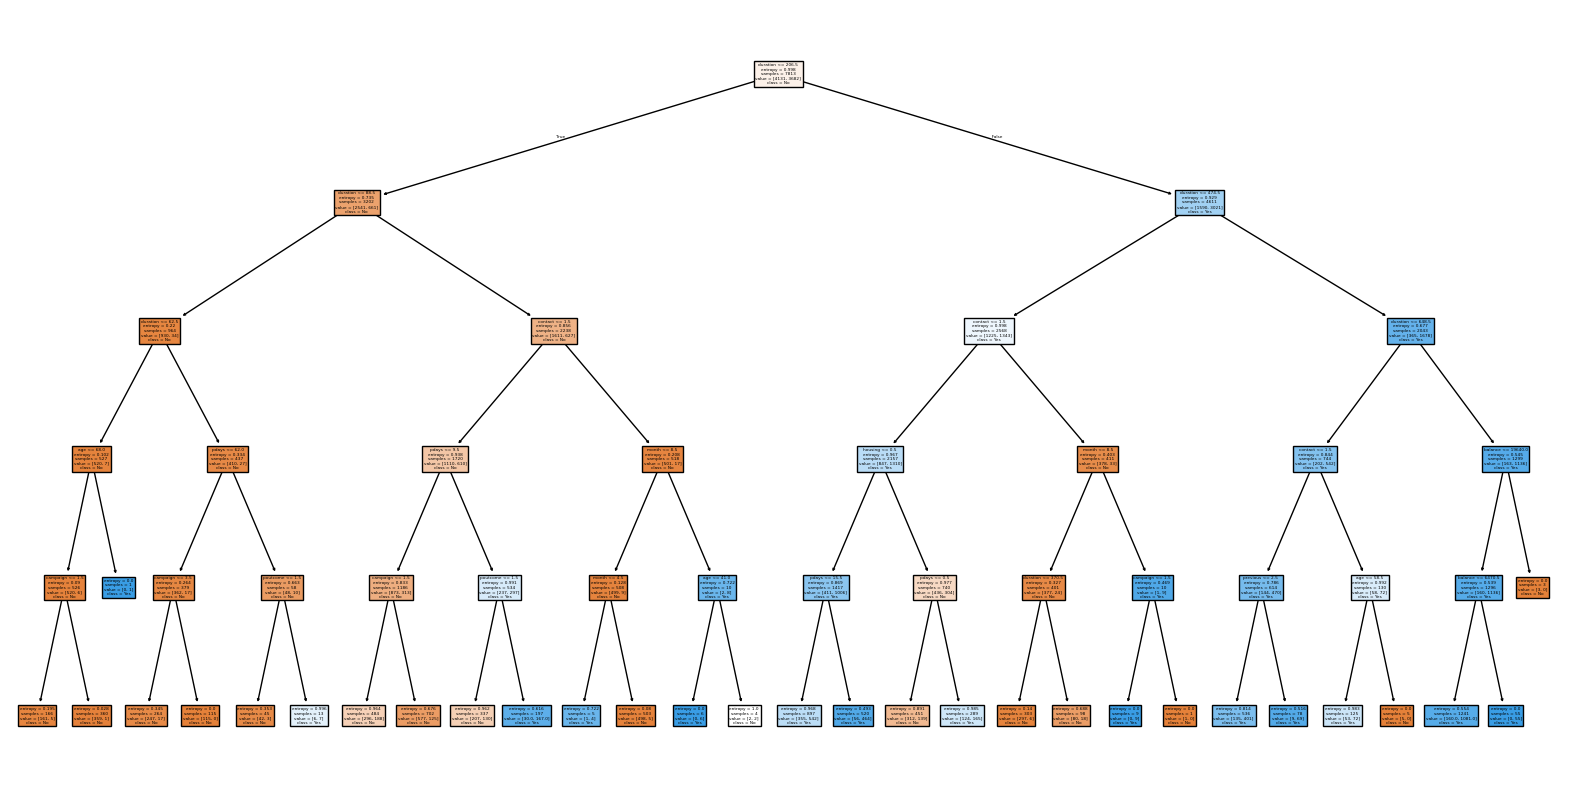

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

data = pd.read_csv('bank.csv.unknown')

le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object' and column != 'deposit':
        data[column] = le.fit_transform(data[column])

data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

X = data.drop('deposit', axis=1)
y = data['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()